### MSc in Data Science, AUEB
## Text Analytics, Assignment 4
### Exercise 2

In [1]:
!pip install --upgrade tensorflow

In [2]:
!pip install -U fasttext

In [3]:
!nvidia-smi

Thu Feb 29 17:29:35 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

##Load the dataset

In [4]:
!wget https://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz
!tar xzf review_polarity.tar.gz

--2024-02-29 17:29:36--  https://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz
Resolving www.cs.cornell.edu (www.cs.cornell.edu)... 132.236.207.36
Connecting to www.cs.cornell.edu (www.cs.cornell.edu)|132.236.207.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3127238 (3.0M) [application/x-gzip]
Saving to: ‘review_polarity.tar.gz.1’

review_polarity.tar 100%[===================>]   2.98M  11.1MB/s    in 0.3s    

2024-02-29 17:29:36 (11.1 MB/s) - ‘review_polarity.tar.gz.1’ saved [3127238/3127238]



In [5]:
import os
from sklearn.datasets import load_files


dataset_path = 'txt_sentoken'
movie_reviews = load_files(container_path = dataset_path, encoding = 'utf-8')


x = movie_reviews.data            #the data
y = movie_reviews.target          #the labels
z = movie_reviews.target_names    #the names of labels

In [6]:
x[:1]

["arnold schwarzenegger has been an icon for action enthusiasts , since the late 80's , but lately his films have been very sloppy and the one-liners are getting worse . \nit's hard seeing arnold as mr . freeze in batman and robin , especially when he says tons of ice jokes , but hey he got 15 million , what's it matter to him ? \nonce again arnold has signed to do another expensive blockbuster , that can't compare with the likes of the terminator series , true lies and even eraser . \nin this so called dark thriller , the devil ( gabriel byrne ) has come upon earth , to impregnate a woman ( robin tunney ) which happens every 1000 years , and basically destroy the world , but apparently god has chosen one man , and that one man is jericho cane ( arnold himself ) . \nwith the help of a trusty sidekick ( kevin pollack ) , they will stop at nothing to let the devil take over the world ! \nparts of this are actually so absurd , that they would fit right in with dogma . \nyes , the film is 

In [7]:
y

array([0, 1, 1, ..., 1, 0, 0])

In [8]:
z

['neg', 'pos']

In [9]:
def average_doc_length(corpus):
    ''' Takes as input a whole corpus
      Returns the average number of words and chars per document '''

    document_word_lengths = [len(doc.split()) for doc in corpus]                            #length of each doc (in words)
    average_doc_length_words = sum(document_word_lengths) / len(document_word_lengths)      #average doc length (in words)

    document_char_lengths = [len(doc) for doc in corpus]                                    #length of each doc (in characters)
    average_doc_length_chars = sum(document_char_lengths) / len(document_char_lengths)      #average doc length (in characters)

    return average_doc_length_words, average_doc_length_chars

In [10]:
print("---Before preprocessing---")
avg_length_words, avg_length_chars = average_doc_length(x)
print("Average Document Length (in words):", avg_length_words)
print("Average Document Length (in characters):", avg_length_chars)

---Before preprocessing---
Average Document Length (in words): 746.3405
Average Document Length (in characters): 3893.002


##Pre-processing

The english stopwords is a package of 179 words that in general, would not help in a sentiment analysis problem. But, since they include terms that are negative, removing them could prove harmful for our case.

e.g. imagine the phrase "I didn't like the film" to end up "like film".

So, the plan is to remove all the stop words that include negative meaning before the preprocessing.

In [11]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

From these words, we will decide which ones to keep because in fact they have a meaningful impact in our sentiment analysis problem, as we stated earlier.

In [12]:
set_stop_words = set(stopwords.words('english'))

to_keep_words = ['not', "don't", "aren't", "couldn't", "didn't", "doesn't", "hadn't", "hasn't" , "shouldn't", "haven't", "wasn't", "weren't",  "isn't", "doesn"]
to_keep_words

['not',
 "don't",
 "aren't",
 "couldn't",
 "didn't",
 "doesn't",
 "hadn't",
 "hasn't",
 "shouldn't",
 "haven't",
 "wasn't",
 "weren't",
 "isn't",
 'doesn']

In [13]:
stopwords_updated = set(stopwords.words('english')) - set(to_keep_words)
print(len(stopwords.words('english')))
print(len(to_keep_words))
print(len(stopwords_updated))

179
14
165


In [14]:
from nltk.stem import WordNetLemmatizer
import re
from tqdm.auto import tqdm
import string
nltk.download('wordnet')

def pre_process_text(text):
    ''' Function to preprocess text.
     input: initial text
     output: processed text
     Performs pre-processing methods:
        1. Combination to a single document.
        2. Convertion to lowercase.
        3. Lemmatization and stop words extraction
        4. Punctuation removal
        5. Number removal
        6. Single characters removal
        7. Converting multiple spaces to single ones
        '''
    lemmatizer = WordNetLemmatizer()
    all_docs = []

    single_char = re.compile(r'\s+[a-z]\s+')                                          #6. Remove single characters
    multiple_space= re.compile(r'\s+')                                                 #7. Replace multiple space with a single one

    stopwords_updated = set(stopwords.words('english')) - set(to_keep_words)
    for document in tqdm(x):

        combined_text = ' '.join(text)            #1.Combine in one single document

        combined_text = combined_text.lower()    #2. Convert to lowercase
        combined_text = [lemmatizer.lemmatize(word) for word in document.split() if word not in stopwords_updated]  # 3.Lemmatize and remove stop words


        combined_text = ' '.join(combined_text)

        combined_text = ''.join([char for char in combined_text if char not in string.punctuation])   #4.remove punctuation
        combined_text = ''.join([char for char in combined_text if not char.isdigit()])     #5.remove numbers

        res = single_char.sub(combined_text, '')
        res2 = multiple_space.sub(combined_text, ' ')
        all_docs.append(combined_text)

    return all_docs

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
processed_text = pre_process_text(x)

processed_text[:1]

  0%|          | 0/2000 [00:00<?, ?it/s]

['arnold schwarzenegger icon action enthusiast  since late s  lately film sloppy oneliner getting worse  hard seeing arnold mr  freeze batman robin  especially say ton ice joke  hey got  million  whats matter  arnold signed another expensive blockbuster  cant compare like terminator series  true lie even eraser  called dark thriller  devil  gabriel byrne  come upon earth  impregnate woman  robin tunney  happens every  year  basically destroy world  apparently god chosen one man  one man jericho cane  arnold   help trusty sidekick  kevin pollack   stop nothing let devil take world  part actually absurd  would fit right dogma  yes  film weak  better blockbuster right  sleepy hollow   make world not enough look like  star film  anyway  definitely doesnt seem like arnold movie  wasnt type film see  sure gave u chuckle well known oneliner  seemed confused character film going  understandable  especially ending changed according source  aside form  still walked  much like past film  im sorry

## Data Augmentation

Our dataset consists of 2000 reviews, as we stated earlier. The size can be considered rather small and classification algorithms may be led to overfitting.

One measure we may take to face this is augmenting the text data. This involves generating new data points by making minor modifications on the existing ones. Here we will use the technique of synonym replacement

**Process**: We split the input sentence into words. For each word, we retrieve synonyms from the 'synsets' function of WordNet. If we find synonyms, we randomly select one and we extract the canonical form of it (lemmatization). Finally, we replace the original word with the lemma if they are different.

In [31]:
import nltk
from nltk.corpus import wordnet
import random


nltk.download('wordnet')


def synonym_replacement(sentence):
    words = sentence.split()
    new_words = words.copy()
    for i in range(len(words)):
        syns = wordnet.synsets(words[i])
        if syns:
            syn = random.choice(syns)
            lemma = syn.lemmas()[0].name()
            new_words[i] = lemma if lemma != words[i] else new_words[i]
    return ' '.join(new_words)


augmented_text = []
augmented_y = []

for i in range(len(processed_text)):
    original_sentence = processed_text[i]
    augmented_sentence = synonym_replacement(original_sentence)
    augmented_text.append(augmented_sentence)
    augmented_y.append(y[i])                        #Append the label for the augmented example
    augmented_text.append(original_sentence)        #Add original sentence as well
    augmented_y.append(y[i])                        #Append the label for the original example


z_augmented = z + z

print("Original data size:", len(processed_text))
print("Augmented data size:", len(augmented_text))
print(len(augmented_y))




[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Original data size: 2000
Augmented data size: 4000
4000


## Splitting into training set (70%), development set (15%) and test set (15%)

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(augmented_text, augmented_y, test_size=0.3, random_state=17)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=25)

training_text = ' '.join(X_train)                    #Flatten into a single string
development_text = ' '.join(X_dev)
test_text = ' '.join(X_test)

training_words = training_text.split()
development_words = development_text.split()
test_words = test_text.split()

training_vocab = set(training_words)
development_vocab = set(development_words)
test_vocab = set(test_words)

In [33]:
print("Training set size (in documents): ", len(y_train))
print("Development set size (in documents): ", len(y_dev))
print("Test set size (in documents): ", len(y_test))
print("Full size (sanity check): ", len(y_train) + len(y_dev) + len(y_test))
print("---------------------------------")
print("Training vocabulary size (in words): " , len(training_vocab))
print("Development vocabulary size (in words): ", len(development_vocab))
print("Test vocabulary size (in words): ", len(test_vocab))
print("Full vocabulary size (in words): ", len(training_vocab) + len(development_vocab) + len(test_vocab))

Training set size (in documents):  2800
Development set size (in documents):  600
Test set size (in documents):  600
Full size (sanity check):  4000
---------------------------------
Training vocabulary size (in words):  46103
Development vocabulary size (in words):  25136
Test vocabulary size (in words):  25410
Full vocabulary size (in words):  96649


In [34]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

print(STOP_WORDS)
print(len(STOP_WORDS))
extra_to_keep = ["n't", "not", "no"]
for i in range(len(extra_to_keep)):
  to_keep_words.append(extra_to_keep[i])

to_keep_words

{'‘re', 'then', 'other', 'yourself', 'quite', 'here', 'though', 'beyond', 'mostly', 'where', 'whereupon', 'least', 'from', 'hereby', 'anyone', 'much', 'nevertheless', 'too', 'them', 'became', 'really', 'part', 'been', 'through', 'upon', 'anything', 'will', 'across', 'ca', 'anywhere', 'fifteen', 'thence', 'being', 'no', 'his', 'three', 'neither', 'last', 'after', 'seemed', 'who', 'hundred', 'every', 'some', 'bottom', "'ve", 'these', 'always', 'move', '’d', 'when', 'about', 'beforehand', 'nobody', 'while', 'up', 'the', 'down', 'what', 'fifty', 'used', 'any', 'twelve', 'should', 'me', 'else', 'you', 'this', 'noone', 'could', 'but', 'keep', '’s', 'ours', 'done', 'seem', 'yours', 'per', 're', 'forty', 'herself', 'none', 'show', 'hers', 'unless', 'former', 'call', 'sometimes', 'one', 'than', 'even', 'that', 'their', 'almost', 'has', 'seeming', 'beside', 'does', 'yet', 'whereas', 'at', 'six', 'hence', 'around', 'on', 'same', 'front', 'nine', 'herein', 'give', '‘ve', 'us', 'do', 'thereafter', 

['not',
 "don't",
 "aren't",
 "couldn't",
 "didn't",
 "doesn't",
 "hadn't",
 "hasn't",
 "shouldn't",
 "haven't",
 "wasn't",
 "weren't",
 "isn't",
 'doesn',
 "n't",
 'not',
 'no']

In [35]:
stop_words_updated = STOP_WORDS - set(to_keep_words)
print(len(stop_words_updated))

323


In [36]:
nlp = spacy.load('en_core_web_sm',disable=["tagger", "parser","ner"])
nlp.add_pipe('sentencizer')

## Use spaCy for sentence splitting & tokenization

In [37]:
def tokenize_sent(x):

  X_tokenized = []
  for idx in tqdm(range(len(x))):
    doc = nlp(x[idx])
    tokens = []
    for sent in doc.sents:
      for tok in sent:
        if '\n' in tok.text or "\t" in tok.text or "--" in tok.text or "*" in tok.text or tok.text.lower() in stop_words_updated or tok.text in string.punctuation or all(x in string.punctuation for x in tok.text):
          continue
        if tok.text.strip():
          tokens.append(tok.text.replace('"',"'").strip().lower())
    X_tokenized.append(tokens)
  return X_tokenized

In [38]:
X_train_tokenized = tokenize_sent(X_train)
X_dev_tokenized = tokenize_sent(X_dev)
X_test_tokenized = tokenize_sent(X_test)

  0%|          | 0/2800 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

In [39]:
import numpy as np

print("Average word length before tokenization:", np.mean([len(x) for x in X_train]))
print("Average word length after tokenization:", np.mean([len(x) for x in X_train_tokenized]))

Average word length before tokenization: 2587.9364285714287
Average word length after tokenization: 314.12142857142857


In [40]:


# Get mean and std of sequence length
train_mean = np.mean([len(x) for x in X_train_tokenized])
train_std = np.std([len(x) for x in X_train_tokenized])
print("Mean of sequence length on training set:", train_mean)
print("Standard deviation of sequence length on training set:", train_std)

print("-----------------------------------------------------------")

dev_mean = np.mean([len(x) for x in X_dev_tokenized])
dev_std = np.std([len(x) for x in X_dev_tokenized])
print("Mean of sequence length on development set:", dev_mean)
print("Standard deviation of sequence length on development set:", dev_std)

print("-----------------------------------------------------------")

test_mean = np.mean([len(x) for x in X_test_tokenized])
test_std = np.std([len(x) for x in X_test_tokenized])
print("Mean of sequence length on test set:", test_mean)
print("Standard deviation of sequence length on test set:", test_std)

Mean of sequence length on training set: 314.12142857142857
Standard deviation of sequence length on training set: 135.9988218361333
-----------------------------------------------------------
Mean of sequence length on development set: 313.7183333333333
Standard deviation of sequence length on development set: 133.6330385691436
-----------------------------------------------------------
Mean of sequence length on test set: 321.41833333333335
Standard deviation of sequence length on test set: 138.53394288244147


In [41]:
print(X_train[0])
print(X_train_tokenized[0])

flubber second full exemplar claim liveliness movie remake adaptation hysterically adequate circulate Disney kind film whitethorn slenderly harbor bantam child anyone else feel entrust boring dense fabulously lifeless could film cinematic charming rather dead water shame could great film hypothetically hateful flubber credibly know remake Disney classical never saw absent mind professor well absent mind professor play fred mcmurray produce erratic substance know flubber know fly rubber Modern one keep basic plot appear add bunch else wish absentmindedness part proffessor villain several showstopping here_and_now like boastfully rumba flubber elaborate frame-up none actually make effective rather make bad BASIC diagram revolve about college professor Philip brainerd robin Williams make draw fortune invention deplorably absent apt fact helium forget wedding college President_of_the_United_States sara denim Reynolds indie actress marcia gay harden deuce fourth_dimension forget begin doesn

## Tokenize, convert text (sequence of words) to sequence of indexes and PAD the sequences

In [42]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import math

MAX_WORDS = 100000
MAX_SEQUENCE_LENGTH =  math.ceil(train_mean + train_std)
EMBEDDING_DIM = 300

tokenizer = Tokenizer(num_words = MAX_WORDS, oov_token ='UNK')
tokenizer.fit_on_texts([" ".join(x) for x in X_train_tokenized])

word_idx = tokenizer.word_index

In [43]:
print("Number of unique words in the word index: ", len(word_idx))

Number of unique words in the word index:  43009


In [44]:
train_sequences = tokenizer.texts_to_sequences([" ".join(x) for x in X_train_tokenized])
dev_sequences = tokenizer.texts_to_sequences([" ".join(x) for x in X_dev_tokenized])
test_sequences = tokenizer.texts_to_sequences([" ".join(x) for x in X_test_tokenized])

train_pad = pad_sequences(train_sequences, maxlen = MAX_SEQUENCE_LENGTH, padding ='post')
dev_pad = pad_sequences(dev_sequences, maxlen = MAX_SEQUENCE_LENGTH, padding ='post')
test_pad = pad_sequences(test_sequences, maxlen = MAX_SEQUENCE_LENGTH, padding ='post')

In [45]:
print(train_sequences[0])
print("------------------------------")
print(train_pad[0])

[2491, 119, 3917, 641, 1163, 3, 1100, 851, 7378, 395, 9229, 331, 73, 2, 447, 2746, 1511, 3678, 53, 50, 3605, 426, 2389, 2390, 2747, 2, 818, 1039, 199, 482, 1536, 41, 2, 13735, 4091, 2491, 758, 14, 1100, 331, 1297, 745, 3190, 131, 782, 3190, 131, 782, 18, 2670, 22606, 530, 8015, 1372, 14, 2491, 14, 819, 5775, 604, 843, 23, 109, 357, 524, 139, 16801, 22607, 343, 12717, 1665, 539, 1666, 7, 3679, 22608, 2491, 2179, 602, 36, 325, 16, 843, 1076, 6840, 783, 782, 2798, 22609, 554, 436, 236, 1177, 4200, 5153, 3190, 2463, 45, 283, 457, 1002, 783, 784, 90, 182, 527, 826, 3918, 5010, 3919, 6362, 429, 8398, 1030, 11756, 225, 912, 1055, 457, 61, 5, 7093, 73, 1178, 2594, 1002, 38, 3836, 764, 8399, 2491, 4, 5776, 7, 4627, 1283, 2079, 210, 327, 139, 1468, 482, 327, 9781, 2798, 561, 4200, 137, 2931, 695, 3532, 783, 1684, 3751, 2565, 22610, 9782, 13736, 4886, 1238, 1752, 3026, 395, 783, 1684, 141, 22611, 1122, 199, 307, 23, 10345, 22612, 7676, 739, 437, 16802, 82, 1553, 82, 1553, 41, 2391, 230, 2, 18, 16

## Download and unzip fasttext binary model for word embeddings

In [46]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
!gzip -d cc.en.300.bin.gz

--2024-02-29 17:53:09--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.162.163.34, 3.162.163.11, 3.162.163.51, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.162.163.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4503593528 (4.2G) [application/octet-stream]
Saving to: ‘cc.en.300.bin.gz’

cc.en.300.bin.gz    100%[===================>]   4.19G   245MB/s    in 20s     

2024-02-29 17:53:30 (211 MB/s) - ‘cc.en.300.bin.gz’ saved [4503593528/4503593528]

gzip: cc.en.300.bin already exists; do you wish to overwrite (y or n)? ^C


## Create embedding matrix

**Process**: The loop iterates over the word_index dictionary, which contains word-to-index mappings generated by the tokenizer. For each word in the word_index, it checks if the index is within the limit of *MAX_WORDS*. If so, it retrieves the corresponding word vector from the FastText model using *fasttext_model.get_word_vector(word=key)* and assigns it to the corresponding row in the embedding_matrix.

In [47]:
import fasttext

print("Loading embeddings model..")
fasttext_model = fasttext.load_model('cc.en.300.bin')
embedding_matrix = np.zeros(shape=((MAX_WORDS + 2), 300))          # +2 because we have reserved indices for padding and out-of-vocabulary tokens

for key, value in word_idx.items():
    if value <= MAX_WORDS:
        embedding_matrix[value] = fasttext_model.get_word_vector(word=key)            #create embedding matrix

del fasttext_model      #save memory

Loading embeddings model..


In [48]:
import tensorflow as tf

class Metrics(tf.keras.callbacks.Callback):

    def __init__(self, valid_data):
        super(Metrics, self).__init__()
        self.validation_data = valid_data

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        val_predict = np.argmax(self.model.predict(self.validation_data[0]), -1)
        val_targ = self.validation_data[1]
        if len(val_targ.shape) == 2 and val_targ.shape[1] != 1:
            val_targ = np.argmax(val_targ, -1)
        val_targ = tf.cast(val_targ,dtype=tf.float32)
        _val_f1 = f1_score(val_targ, val_predict,average="weighted")
        _val_recall = recall_score(val_targ, val_predict,average="weighted")
        _val_precision = precision_score(val_targ, val_predict,average="weighted")
        logs['val_f1'] = _val_f1
        logs['val_recall'] = _val_recall
        logs['val_precision'] = _val_precision
        print(" — val_f1: %f — val_precision: %f — val_recall: %f" % (_val_f1, _val_precision, _val_recall))
        return

## Create one-hot vectors

In [49]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_dev = tf.keras.utils.to_categorical(y_dev, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

## Stacked CNNs followed by Max-Pooling

In [50]:
import tensorflow.keras.backend as K

def recall(y_true, y_pred):

    """
    Recall metric.
    Only computes a batch-wise average of recall.
    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def precision(y_true, y_pred):

    """
    Precision metric.
    Only computes a batch-wise average of precision.
    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    Source
    ------
    https://github.com/fchollet/keras/issues/5400#issuecomment-314747992
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def f1(y_true, y_pred):

    """Calculate the F1 score."""
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * ((p * r) / (p + r))


def accuracy(y_true, y_pred):
    return K.mean(K.equal(y_true, K.round(y_pred)), axis = 1)

In [51]:
def build_model(hp):

  N_CLASSES = 2
  DENSE = 64
  learning_rate = hp.Choice('learning_rate', values=[1e-3, 1e-2, 1e-1])
  dropout_rate = hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.05)
  num_conv_layers = hp.Int('num_conv_layers', min_value = 1, max_value = 5, step = 1)
  kernel_size = hp.Int('kernel_size', min_value = 1, max_value = 4, step = 1)

  model = tf.keras.Sequential()

  model.add(tf.keras.Input(shape = (MAX_SEQUENCE_LENGTH,), dtype = "int32"))

  model.add(tf.keras.layers.Embedding(input_dim = MAX_WORDS,
                                      output_dim = EMBEDDING_DIM,
                                      input_length = MAX_SEQUENCE_LENGTH,
                                      trainable = False))

  model.add(tf.keras.layers.Dropout(dropout_rate))

  for i in range(1, num_conv_layers + 1):
    model.add(tf.keras.layers.Conv1D(filters = EMBEDDING_DIM,
                                     kernel_size = kernel_size,
                                     activation = 'relu',
                                     padding = 'same'))

  model.add(tf.keras.layers.GlobalMaxPooling1D())

  model.add(tf.keras.layers.Dropout(dropout_rate))

  model.add(tf.keras.layers.Dense(DENSE, activation = 'relu'))

  model.add(tf.keras.layers.Dense(N_CLASSES, activation='sigmoid'))

  print(model.summary())

  model.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate),
                metrics = [precision, recall, f1, accuracy, 'binary_accuracy'])



  return model
#metrics = [precision, recall, f1, accuracy, tf.keras.metrics.AUC()]

In [52]:
!pip install keras-tuner

In [56]:
from keras_tuner.tuners import RandomSearch
import keras_tuner as kt
tuner = RandomSearch(
    build_model,
    objective=kt.Objective('val_binary_accuracy', direction='max'),
    max_trials=7,
    executions_per_trial=1,
    directory='keras_tuner_logs',
    project_name='hyperparameter_tuning_cnn'
)


tuner.search(
    train_pad,
    y_train,
    validation_data=(dev_pad, y_dev),
    batch_size=256,
    epochs=30,
    shuffle=True,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_binary_accuracy', patience=20, restore_best_weights=True)
    ]
)


best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 10 Complete [00h 03m 24s]
val_binary_accuracy: 0.6800000071525574

Best val_binary_accuracy So Far: 0.8416666388511658
Total elapsed time: 00h 20m 42s


In [57]:
best_kernel_size = best_hp.get('kernel_size')
best_dropout_rate = best_hp.get('dropout_rate')
best_learning_rate = best_hp.get('learning_rate')
best_num_conv_layers = best_hp.get('num_conv_layers')

print("Best hyperparameters:")
print("Kernel Size:", best_kernel_size)
print("Dropout Rate:", best_dropout_rate)
print("Number of convolution layers:", best_num_conv_layers)
print("Learning rate: ", best_learning_rate)

Best hyperparameters:
Kernel Size: 1
Dropout Rate: 0.35000000000000003
Number of convolution layers: 1
Learning rate:  0.001


In [58]:
best_model = tuner.hypermodel.build(best_hp)       #build model with the best hyperparameters

history = best_model.fit(
    train_pad,
    y_train,
    validation_data=(dev_pad, y_dev),
    batch_size=256,
    epochs=30,
    shuffle=True,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_binary_accuracy', patience=20, restore_best_weights=True)
    ]
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 451, 300)          30000000  
                                                                 
 dropout_2 (Dropout)         (None, 451, 300)          0         
                                                                 
 conv1d_5 (Conv1D)           (None, 451, 300)          90300     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 300)               0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_3 (Dropout)         (None, 300)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                19264     
                                                      

##Visualize Model's Training History

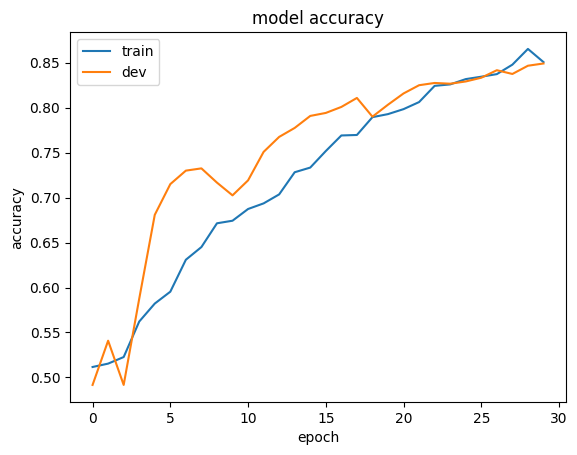

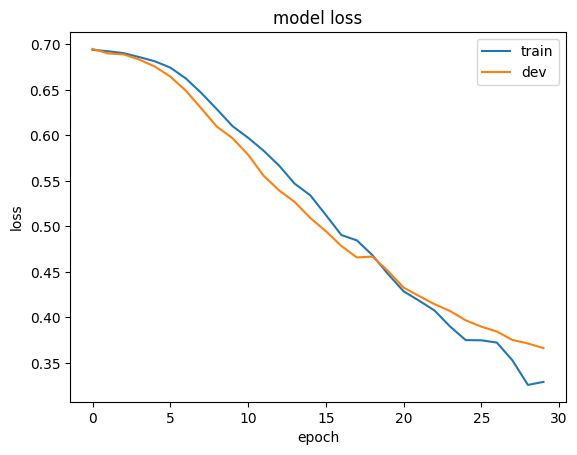

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper right')
plt.show()

## Metrics - Classification Report

In [61]:
from sklearn.metrics import roc_auc_score

def calculate_auc_scores(model, data, labels):
    predictions = np.argmax(model.predict(data, verbose=0), -1)
    true_labels = np.argmax(labels, -1)
    auc_scores = []
    for class_index in range(labels.shape[1]):
        class_true = (true_labels == class_index).astype(int)
        class_probs = model.predict(data, verbose=0)[:, class_index]
        roc_auc = roc_auc_score(class_true, class_probs)
        auc_scores.append(roc_auc)
    macro_auc = np.mean(auc_scores)
    return auc_scores, macro_auc

In [62]:
from sklearn.metrics import classification_report


predictions_train = np.argmax(best_model.predict(train_pad, verbose=0), -1)
y_train_ = np.argmax(y_train, -1)
print('Classification report - Training set')
print('------------------------')
print(classification_report(y_train_, predictions_train))

Classification report - Training set
------------------------
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1376
           1       0.95      0.92      0.93      1424

    accuracy                           0.93      2800
   macro avg       0.93      0.93      0.93      2800
weighted avg       0.93      0.93      0.93      2800



In [63]:
predictions_dev = np.argmax(best_model.predict(dev_pad, verbose=0), -1)
y_dev_ = np.argmax(y_dev, -1)
print('Classification report - Development set')
print('------------------------')
print(classification_report(y_dev_, predictions_dev))

Classification report - Development set
------------------------
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       305
           1       0.86      0.83      0.85       295

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600



In [64]:
predictions_test = np.argmax(best_model.predict(test_pad, verbose=0), -1)
y_test_ = np.argmax(y_test, -1)
print('Classification report - Test set')
print('---------------------------')
print(classification_report(y_test_, predictions_test))

Classification report - Test set
---------------------------
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       319
           1       0.85      0.84      0.84       281

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600



In [65]:
train_auc_scores, train_macro_auc = calculate_auc_scores(best_model, train_pad, y_train)
dev_auc_scores, dev_macro_auc = calculate_auc_scores(best_model, dev_pad, y_dev)
test_auc_scores, test_macro_auc = calculate_auc_scores(best_model, test_pad, y_test)

print("Train AUC Scores:")
for class_index, auc_score in enumerate(train_auc_scores):
    print(f"Class {class_index}: {auc_score}")
print(f"Train Macro AUC: {train_macro_auc}")

print("\nDev AUC Scores:")
for class_index, auc_score in enumerate(dev_auc_scores):
    print(f"Class {class_index}: {auc_score}")
print(f"Dev Macro AUC: {dev_macro_auc}")

print("\nTest AUC Scores:")
for class_index, auc_score in enumerate(test_auc_scores):
    print(f"Class {class_index}: {auc_score}")
print(f"Test Macro AUC: {test_macro_auc}")

Train AUC Scores:
Class 0: 0.9821753739874576
Class 1: 0.9827321702704468
Train Macro AUC: 0.9824537721289521

Dev AUC Scores:
Class 0: 0.9181661572659071
Class 1: 0.918488469019172
Dev Macro AUC: 0.9183273131425396

Test AUC Scores:
Class 0: 0.9187184149756246
Class 1: 0.9194770133535627
Test Macro AUC: 0.9190977141645936
